In [4]:
from numpy import*
import matplotlib.pyplot as plt
%matplotlib inline
import control as co
import numpy as np

In [5]:
# W = -(M*I)-M*m*l^2-m*I
# Z = M*m*g*l+(m^2)*g*l
# ftrans = (m*l)/(a*s^2+b)

In [6]:
def fun_transf(M,I,m,l,g,s):
    N=len(s)
    y=zeros(N)
    for i in range (0,N):
        y[i] = (m*l)/((-(M*I)-M*m*l*l-m*I)*(s[i]*s[i])+(M*m*g*l+(m*m)*g*l))
    return y

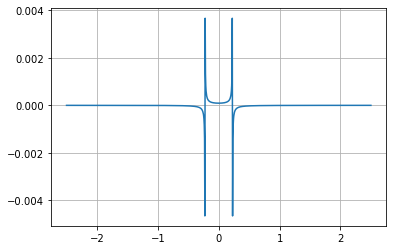

In [7]:
s= np.linspace(-2.5,2.5,1000)
M = 720
I = 20
m = 400
l = 300
g = 9.81
r = fun_transf(M,I,m,l,g,s)
plt.plot(s,r)
plt.grid()

In [8]:
#W = -(M*I)-M*m*l^2-m*I
#Z = M*m*g*l+(m^2)*g*l

G1 = co.tf([m*l],[-(M*I)-M*m*l*l-m*I, 0 , M*m*g*l+(m*m)*g*l])
G1

TransferFunction(array([120000]), array([-2.59200224e+10,  0.00000000e+00,  1.31846400e+09]))

In [9]:
#Controlador Proporcional Integral
Kp = 1500
Ki = -350
PI = co.tf([Kp],[1]) + co.tf([Ki],[1,0])
PI

TransferFunction(array([1500, -350]), array([1, 0]))

In [10]:
G2 = PI * G1
G3 = co.feedback(G2,1)
print(G3)


         1.8e+08 s - 4.2e+07
--------------------------------------
-2.592e+10 s^3 + 1.498e+09 s - 4.2e+07



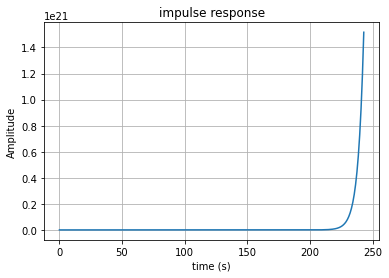

In [11]:
#Resposta controlador PI
t = np.linspace(0, 2, 100)
t, y = co.step_response(G3)
plt.plot(t, y)
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('impulse response')
plt.grid()

In [12]:
co.dcgain(G3)

1.0